In [1]:
import os, sys
import dotenv

import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

sys.path.append(os.environ.get('PATH_OPENSKY'))
from user_eval import get_df_posts 
from news_outlet_eval import get_news_feed, get_posts_from_nos

dotenv.load_dotenv('.env')    
PATH_DATA = os.environ.get('PATH_OPENSKY') + os.environ.get('PATH_REL_DATA')
PATH_USER_POSTS = PATH_DATA + 'user_posts/'

PATH_RESULTS = os.environ.get('PATH_OPENSKY') + 'results/'

COLOR_POSITIVE = os.environ.get('COLOR_POSITIVE')
COLOR_NEUTRAL = os.environ.get('COLOR_NEUTRAL')
COLOR_NEGATIVE = os.environ.get('COLOR_NEGATIVE')

df_all_cutoff = pd.read_csv(PATH_RESULTS + 'nonnews_cutoff_v1.csv')
df_news_cutoff = pd.read_csv(PATH_RESULTS + 'news_cutoff_v1.csv')


In [2]:
df_all_cutoff

,post_id,user_id,date,labels,sent_label,sent_score,reply_to,thread_root
0,79799347,527934,2024-02-13 16:55:00,NaN,neutral,0.928,6369073.0,6369073.0
1,79799462,527934,2024-02-04 03:41:00,NaN,neutral,0.658,1960204.0,1960204.0
2,79800556,527934,2023-10-28 18:56:00,NaN,neutral,0.625,160257.0,160257.0
3,38539170,317609,2024-03-04 10:02:00,NaN,positive,0.984,38539124.0,38539124.0
4,38539863,317609,2024-02-18 12:01:00,NaN,positive,0.985,187711.0,187711.0
...,...,...,...,...,...,...,...,...
1350564,52363070,1057073,2023-08-24 03:50:00,NaN,neutral,0.680,18602800.0,18602800.0
1350565,52363077,1057073,2023-08-06 20:04:00,NaN,positive,0.455,11592045.0,11592045.0
1350566,68998727,1848807,2023-10-17 07:28:00,NaN,positive,0.977,2175936.0,2175936.0
1350567,177173027,3283530,2024-03-09 03:30:00,NaN,negative,0.884,65862.0,65862.0


In [3]:
df_news_cutoff

,post_id,user_id,instance,date,text,langs,like_count,reply_count,repost_count,reply_to,replied_author,thread_root,thread_root_author,repost_from,reposted_author,quotes,quoted_author,labels,sent_label,sent_score
0,10657231,284413,bsky.social,2023-12-30 16:52:00,"and by the way, NYT, gtfo, you disgusting russ...",['eng'],8,0,0,10657232.0,379.0,10657232.0,379.0,NaN,NaN,NaN,NaN,NaN,negative,0.945
1,10657233,284413,bsky.social,2023-12-30 16:41:00,"ah, yes…NYT. Unfortunately only 14..but hopefu...",['eng'],7,1,0,10657232.0,379.0,10657232.0,379.0,NaN,NaN,NaN,NaN,NaN,negative,0.921
2,10657281,284413,bsky.social,2023-12-24 15:29:00,Reminds me of,['eng'],3,0,0,705616.0,379.0,705616.0,379.0,NaN,NaN,NaN,NaN,NaN,neutral,0.699
3,10657446,284413,bsky.social,2023-12-09 15:01:00,jesus christ… this is straight from medieval t...,['eng'],1,0,0,3158145.0,379.0,3158145.0,379.0,NaN,NaN,NaN,NaN,NaN,negative,0.825
4,10657677,284413,bsky.social,2023-11-22 17:34:00,progressive..more like pro-hamas,['eng'],0,2,0,10657678.0,16202.0,10657678.0,16202.0,NaN,NaN,NaN,NaN,NaN,neutral,0.780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9913,110584107,527683,bsky.social,2023-10-06 20:06:00,Are you kidding?\n\nThere are always people wh...,['eng'],3,1,0,4108566.0,379.0,4108566.0,379.0,NaN,NaN,NaN,NaN,NaN,negative,0.929
9914,105014318,92560,bsky.social,2024-03-08 01:59:00,What a complete abdication of good journalism ...,['eng'],0,0,0,698597.0,9.0,698597.0,9.0,NaN,NaN,NaN,NaN,NaN,negative,0.790
9915,105014322,92560,bsky.social,2024-03-07 22:16:00,Trump and Biden are at par with age...exactly ...,['eng'],4,0,0,127576.0,379.0,127576.0,379.0,NaN,NaN,NaN,NaN,NaN,negative,0.867
9916,105014501,92560,bsky.social,2024-01-05 08:08:00,Because doctors are literally refusing to pres...,['eng'],1,0,0,145919.0,379.0,145919.0,379.0,NaN,NaN,NaN,NaN,NaN,negative,0.882


In [4]:
df_news_posts_agg = df_news_cutoff.groupby('sent_label').agg({'sent_label': 'count'})
df_all_replies_agg = df_all_cutoff.groupby('sent_label').agg({'sent_label': 'count'})
cont_table = df_news_posts_agg.join(df_all_replies_agg, lsuffix='_news_replies', rsuffix='_not_news_replies').T
#cont_table['total'] = cont_table.sum(axis=1)
#cont_table  = cont_table.T
#cont_table['total'] = cont_table.sum(axis=1)
cont_table

sent_label,negative,neutral,positive
sent_label_news_replies,6166,2779,973
sent_label_not_news_replies,418345,470954,461270


In [5]:
news_proportions = cont_table.loc['sent_label_news_replies'].values.flatten()
non_news_proportions = cont_table.loc['sent_label_not_news_replies'].values.flatten()

# Normalize the data
news_proportions = news_proportions / news_proportions.sum()
non_news_proportions = non_news_proportions / non_news_proportions.sum()

news_proportions, non_news_proportions

(array([0.62169792, 0.28019762, 0.09810446]),
 array([0.30975463, 0.34870784, 0.34153753]))

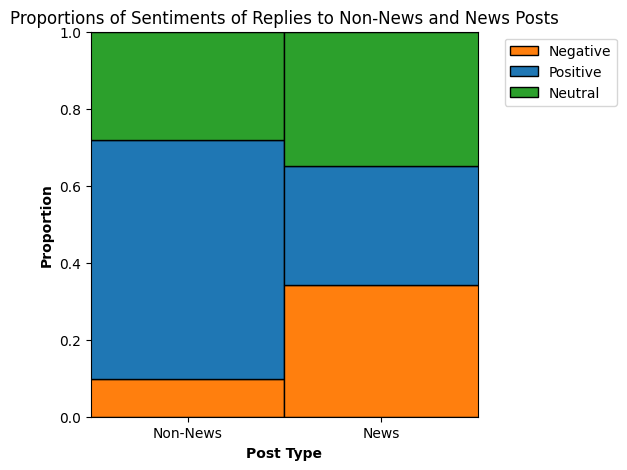

In [6]:
# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r = np.arange(2)

# Create the bar chart
fig, ax = plt.subplots(figsize=(5, 5))

# Plot bars for news proportions
ax.bar(r, news_proportions[2], color=COLOR_NEGATIVE, width=bar_width, edgecolor='black', label='Negative')
ax.bar(r, news_proportions[0], bottom=news_proportions[2], color=COLOR_POSITIVE, width=bar_width, edgecolor='black', label='Positive')
ax.bar(r, news_proportions[1], bottom=news_proportions[2] + news_proportions[0], color=COLOR_NEUTRAL, width=bar_width, edgecolor='black', label='Neutral')

# Plot bars for non-news proportions without labels
ax.bar(r + bar_width, non_news_proportions[2], color=COLOR_NEGATIVE, width=bar_width, edgecolor='black')
ax.bar(r + bar_width, non_news_proportions[0], bottom=non_news_proportions[2], color=COLOR_POSITIVE, width=bar_width, edgecolor='black')
ax.bar(r + bar_width, non_news_proportions[1], bottom=non_news_proportions[2] + non_news_proportions[0], color=COLOR_NEUTRAL, width=bar_width, edgecolor='black')

# Add labels
ax.set_xlabel('Post Type', fontweight='bold')
ax.set_ylabel('Proportion', fontweight='bold')
ax.set_title('Proportions of Sentiments of Replies to Non-News and News Posts')
ax.set_xticks([bar_width/4, 3*bar_width/4])
ax.set_xticklabels(['Non-News', 'News'])
ax.set_ylim(0, 1)
ax.set_xlim(0, bar_width)

# Add legend outside of the graph
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [7]:
ax.get_xticks()

array([0.0875, 0.2625])

In [12]:
# Create the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)  # Adjust the figure size as needed

# Visualization 1
num_sent_replies_1 = df_all_cutoff.groupby(['reply_to', 'sent_label']).size().unstack()
normalized_df_1 = num_sent_replies_1.apply(lambda x: x / x.sum(), axis=1)
normalized_df_1 = normalized_df_1.sort_values(by='negative', ascending=False)
normalized_df_1.replace(np.nan, 0, inplace=True)

color_map = {
    'positive': COLOR_POSITIVE,
    'neutral': COLOR_NEUTRAL,
    'negative': COLOR_NEGATIVE
}

normalized_df_1.reset_index(inplace=True, drop=True)
ax1 = normalized_df_1.plot(kind='bar', stacked=True, ax=ax1, width=1, edgecolor=None, color=[color_map[col] for col in normalized_df_1.columns])
ax1.set_xlabel('Individual Non-News Posts')
ax1.set_ylabel('Proportion per Sentiment in Replies')
ax1.set_title('Normalized Sentiment Distribution by Individual Non-News Post')
ax1.set_ylim(0, 1)

# Set xticks to the original indices of the sampled rows
xticks_1 = range(0, len(normalized_df_1), 50)
ax1.set_xticks(xticks_1)
ax1.set_xticklabels(normalized_df_1.index[::50])

# Visualization 2
num_sent_replies_2 = df_news_cutoff.groupby(['reply_to', 'sent_label']).size().unstack()

normalized_df_2 = num_sent_replies_2.apply(lambda x: x / x.sum(), axis=1)
normalized_df_2 = normalized_df_2.sort_values(by='negative', ascending=False)
normalized_df_2.replace(np.nan, 0, inplace=True)

normalized_df_2.reset_index(inplace=True, drop=True)
subset_normalized_df_2 = normalized_df_2.iloc[::50]

ax2 = subset_normalized_df_2.plot(kind='bar', stacked=True, ax=ax2, width=1, edgecolor=None, color=[color_map[col] for col in subset_normalized_df_2.columns])
ax2.set_xlabel('Individual News Posts')
ax2.set_ylabel('Proportion per Sentiment in Replies')
ax2.set_title('Normalized Sentiment Distribution by Individual News Post')
#ax2.set_ylim(0, 1)

# Set xticks to the original indices of the sampled rows
xticks_2 = range(0, len(subset_normalized_df_2), 400)
ax2.set_xticks(xticks_2)
ax2.set_xticklabels(subset_normalized_df_2.index[::400])

plt.tight_layout()

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f3fa9f5c8e0>>
Traceback (most recent call last):
  File "/home/ties/Documents/00_Uni/24W/Foundations/opensky/.venv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 
